In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numexpr
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
lora_mons_static = pd.read_pickle('../data/lora_mons_static_clean.pkl.gz')

As this channel has the best transmission rate, the data will focus on 'static_6_03' to 'eui-0000024b08030186'.

In [3]:
gtw_mask = lora_mons_static['gtw_id'] =='eui-0000024b08030186'
dev_mask = lora_mons_static['dev_id'] == 'static_6_03'
mask = gtw_mask & dev_mask
channel = lora_mons_static.loc[mask, ['received', 'rssi', 'snr']].set_index('received').sort_index()
channel.index = channel.index.tz_convert('Europe/Brussels')
channel.head()
rssi = channel[['rssi']]
snr = channel[['snr']]

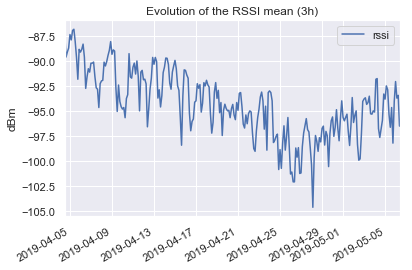

In [4]:
ax = rssi.resample('3h').mean().plot()
ax.set(xlabel='', ylabel='dBm', title='Evolution of the RSSI mean (3h)');

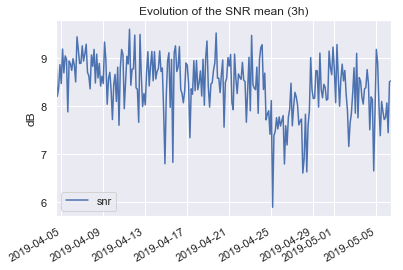

In [5]:
ax = snr.resample('3h').mean().plot()
ax.set(xlabel='', ylabel='dB', title='Evolution of the SNR mean (3h)');

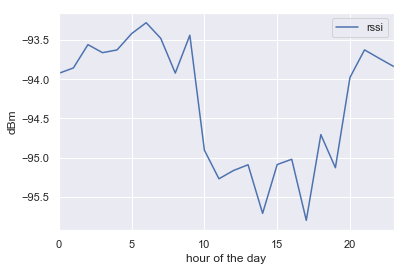

In [6]:
ax = rssi.groupby(rssi.index.hour).mean().plot()
ax.set(xlabel='hour of the day', ylabel='dBm');

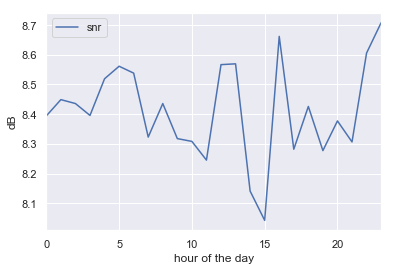

In [7]:
ax = snr.groupby(snr.index.hour).mean().plot()
ax.set(xlabel='hour of the day', ylabel='dB');

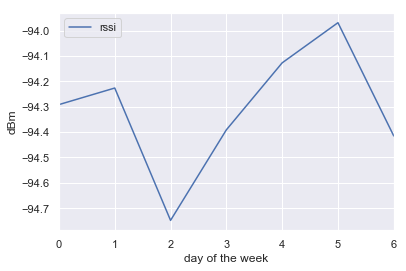

In [8]:
ax = rssi.groupby(rssi.index.weekday).mean().plot()
ax.set(xlabel='day of the week', ylabel='dBm');

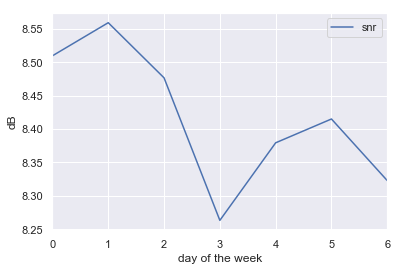

In [9]:
ax = snr.groupby(snr.index.weekday).mean().plot()
ax.set(xlabel='day of the week', ylabel='dB');